In [1]:
import numpy as np
import rosbag

from matplotlib import pyplot as plt

import plotly.express as px

In [2]:
rosbag_fn = '/mnt/d/rs_map_data/000-pose.bag'

In [3]:
f = open(rosbag_fn, 'rb')
abag = rosbag.Bag(f, mode='r', chunk_threshold=20e6)

In [4]:
abag.get_message_count()

9063

In [5]:
topic_info = abag.get_type_and_topic_info()
for k in topic_info.topics.keys():
    print(k)

/device_0/info
/device_0/sensor_0/Pose_0/info
/device_0/sensor_0/Pose_0/pose/accel/data
/device_0/sensor_0/Pose_0/pose/metadata
/device_0/sensor_0/Pose_0/pose/transform/data
/device_0/sensor_0/Pose_0/pose/twist/data
/device_0/sensor_0/Pose_0/tf/0
/device_0/sensor_0/info
/device_0/sensor_0/option/Asic_Temperature/description
/device_0/sensor_0/option/Asic_Temperature/value
/device_0/sensor_0/option/Enable_Auto_Exposure/description
/device_0/sensor_0/option/Enable_Auto_Exposure/value
/device_0/sensor_0/option/Enable_Dynamic_Calibration/description
/device_0/sensor_0/option/Enable_Dynamic_Calibration/value
/device_0/sensor_0/option/Enable_Map_Preservation/description
/device_0/sensor_0/option/Enable_Map_Preservation/value
/device_0/sensor_0/option/Enable_Mapping/description
/device_0/sensor_0/option/Enable_Mapping/value
/device_0/sensor_0/option/Enable_Pose_Jumping/description
/device_0/sensor_0/option/Enable_Pose_Jumping/value
/device_0/sensor_0/option/Enable_Relocalization/description
/

In [6]:
msg_iter = abag.read_messages()

In [57]:
m = next(msg_iter)
m.topic

'/device_0/sensor_0/Pose_0/pose/transform/data'

In [77]:
m.timestamp.secs

0

In [125]:
def extract_timestamp(msg):
    return msg.timestamp.secs + msg.timestamp.nsecs / 1.0e9
    
def extract_position(msg):
    return (extract_timestamp(msg),
            msg.message.translation.x,
            msg.message.translation.y,
            msg.message.translation.z)

def extract_uint8_image(msg):
    return (extract_timestamp(msg),
           np.reshape(np.frombuffer(msg.message.data, dtype=np.uint8), (msg.message.height, msg.message.width)))

def extract_uint16_image(msg):
    return (extract_timestamp(msg),
           np.reshape(np.frombuffer(msg.message.data, dtype=np.uint16), (msg.message.height, msg.message.width)))

def extract_rgb8_image(msg):
    return (extract_timestamp(msg),
           np.reshape(np.frombuffer(msg.message.data, dtype=np.uint8), (msg.message.height, msg.message.width, 3)))


In [8]:
pose_iter = abag.read_messages(topics='/device_0/sensor_0/Pose_0/pose/transform/data')

poses = [extract_position(p) for p in pose_iter]

0.004997304511086474 +/- 0.0016071467301487915 [0.00012427299999995256,0.014522866000000079]


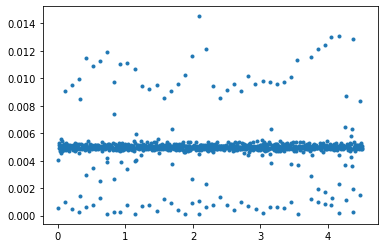

In [13]:
t = [p[0] for p in poses]
dts = np.diff(t)
print(f'{np.mean(dts)} +/- {np.std(dts)} [{np.min(dts)},{np.max(dts)}]')
plt.plot(t[1:], dts, '.')
plt.show()

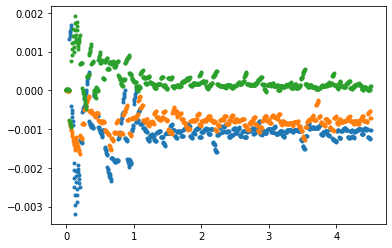

(4.507569867, -0.0010301334550604224, -0.0007116787019185722, 0.00010646723239915445)


In [9]:
plt.plot([p[0] for p in poses], [p[1] for p in poses], '.',
         [p[0] for p in poses], [p[2] for p in poses], '.',
         [p[0] for p in poses], [p[3] for p in poses], '.')
plt.show()
print(poses[-1])

In [ ]:
px.scatter_3d(x=[p[1] for p in poses], y=[p[2] for p in poses], z=[p[3] for p in poses])

# Depth data

In [2]:
rosbag_fn = '/mnt/d/rs_map_data/000-depth.bag'

In [3]:
f = open(rosbag_fn, 'rb')
abag = rosbag.Bag(f, mode='r', chunk_threshold=20e6)

In [20]:
topic_info = abag.get_type_and_topic_info()
print(abag.get_message_count())
for k in topic_info.topics.keys():
    print(k)

5190
/device_0/info
/device_0/sensor_0/Depth_0/image/data
/device_0/sensor_0/Depth_0/image/metadata
/device_0/sensor_0/Depth_0/info
/device_0/sensor_0/Depth_0/info/camera_info
/device_0/sensor_0/Depth_0/tf/0
/device_0/sensor_0/info
/device_0/sensor_0/option/Asic_Temperature/description
/device_0/sensor_0/option/Asic_Temperature/value
/device_0/sensor_0/option/Depth_Units/description
/device_0/sensor_0/option/Depth_Units/value
/device_0/sensor_0/option/Emitter_Enabled/description
/device_0/sensor_0/option/Emitter_Enabled/value
/device_0/sensor_0/option/Emitter_On_Off/description
/device_0/sensor_0/option/Emitter_On_Off/value
/device_0/sensor_0/option/Enable_Auto_Exposure/description
/device_0/sensor_0/option/Enable_Auto_Exposure/value
/device_0/sensor_0/option/Error_Polling_Enabled/description
/device_0/sensor_0/option/Error_Polling_Enabled/value
/device_0/sensor_0/option/Exposure/description
/device_0/sensor_0/option/Exposure/value
/device_0/sensor_0/option/Frames_Queue_Size/descriptio

In [5]:
info_iter = abag.read_messages(topics='/device_0/sensor_1/Color_0/info/camera_info')

In [6]:
msg = next(info_iter)
msg

BagMessage(topic='/device_0/sensor_1/Color_0/info/camera_info', message=header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
height: 480
width: 640
distortion_model: "Inverse Brown Conrady"
D: [0.0, 0.0, 0.0, 0.0, 0.0]
K: [606.6354370117188, 0.0, 318.53692626953125, 0.0, 606.5582275390625, 233.09754943847656, 0.0, 0.0, 1.0]
R: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
P: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
binning_x: 0
binning_y: 0
roi: 
  x_offset: 0
  y_offset: 0
  height: 0
  width: 0
  do_rectify: False, timestamp=rospy.Time[1])

In [116]:
rgb_iter = abag.read_messages(topics='/device_0/sensor_1/Color_0/image/data')

In [117]:
rgb_messages = [r for r in rgb_iter]
len(rgb_messages)

87

0.056414859988372104 +/- 0.012431722847804342 [0.009546767999999997,0.0704844360000001]


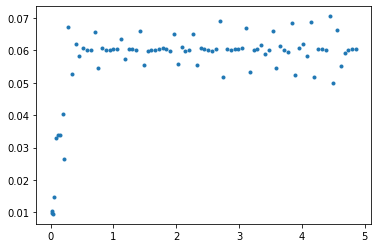

In [119]:
t = [extract_timestamp(m) for m in rgb_messages]
dts = np.diff(t)
print(f'{np.mean(dts)} +/- {np.std(dts)} [{np.min(dts)},{np.max(dts)}]')
plt.plot(t[1:], dts, '.')
plt.show()

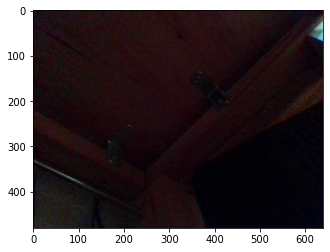

In [120]:
 _, img = extract_rgb8_image(rgb_messages[-1])
plt.imshow(img)
plt.show()

In [121]:
depth_iter = abag.read_messages(topics='/device_0/sensor_0/Depth_0/image/data')

In [122]:
depth_messages = [d for d in depth_iter]
len(depth_messages)

143

0.034363191887323945 +/- 0.012874667457696855 [0.02499684099999988,0.184437777]


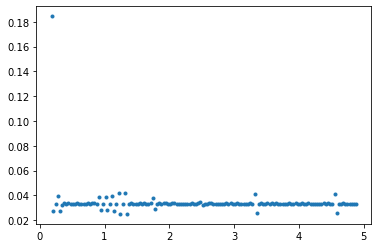

In [123]:
t = [extract_timestamp(m) for m in depth_messages]
dts = np.diff(t)
print(f'{np.mean(dts)} +/- {np.std(dts)} [{np.min(dts)},{np.max(dts)}]')
plt.plot(t[1:], dts, '.')
plt.show()

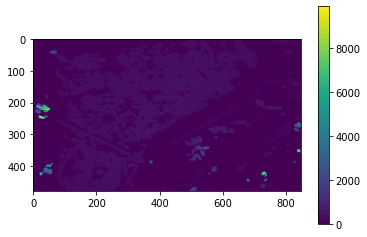

In [127]:
 _, img = extract_uint16_image(depth_messages[-1])
plt.imshow(img)
plt.colorbar()
plt.show()

In [128]:
f.close()